In [1]:
import pandas as pd
import numpy as np
import os
import json

In [4]:
path = '../../data/gaia/raw/common_kinematics.h5'
df = pd.read_hdf(path, key='star')
print(len(df))

75716


<Axes: xlabel='XGC', ylabel='YGC'>

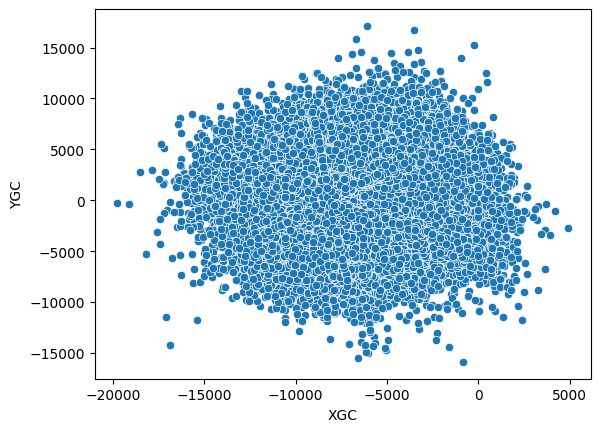

In [5]:
import seaborn as sns

sns.scatterplot(data=df, x='XGC', y='YGC')

In [6]:
df = df.loc[(df['XGC']+8200)**2 + df['YGC']**2 + df['ZGC']**2 < 10000**2]
df = df.loc[df['zmax']>=4000]
print(len(df))

73910


In [7]:
def compute_extra(df):
    df['RGC'] = (df['XGC']**2 + df['YGC']**2)**0.5
    df['Vtot'] = (df['U']**2 + df['V']**2 + df['W']**2)**0.5
    df['PhiGC'] = np.arctan2(df['YGC'], df['XGC'])
    return df

In [11]:
df = compute_extra(df)

<Axes: xlabel='PhiGC', ylabel='RGC'>

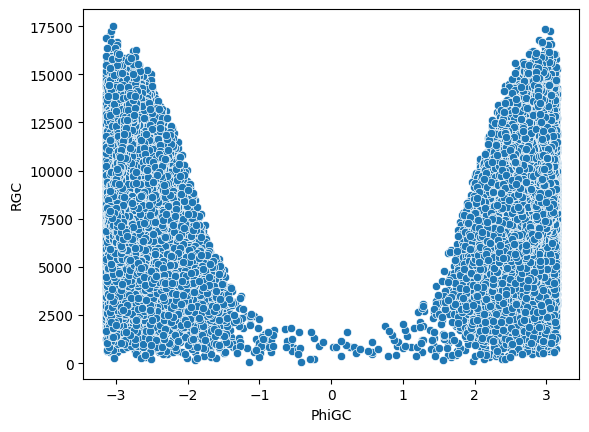

In [10]:
sns.scatterplot(data=df, x='PhiGC', y='RGC')

In [5]:
output_path = '../../data/gaia/raw/common_kinematics_10kpc.h5'
print(len(df))
df.to_hdf(output_path, key='star')

73910


In [6]:
df_norm = {'mean':{}, 'std':{}}
for column in df.columns:
    df_norm['std'][column] = float(np.std(df[column]))
    df_norm['mean'][column] = float(np.mean(df[column]))
with open('../../data/gaia/raw/common_kinematics_10kpc_norm.json', 'w') as f:
    json.dump(df_norm, f)